In [ ]:
#import PACKAGES
import numpy as np
import pandas as pd
import pandas.util.testing as tm
from statsmodels.robust.scale import huber
import array as arr
from scipy.stats import cauchy
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from scipy.stats import wilcoxon
from scipy import stats
#import statistics as stats

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Defining terms for the empirical ROC
def plot_roc(y_test,probs):
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc) 
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()


In [ ]:
#packages to read data and split
#Logistic regression is used for binary classification problem
#It help split the data into training and testing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
#Read data for all the estimates
data = pd.read_csv('Together2.csv')
h = list(data.columns.values)
h[:-1]

['Winn1',
 'Winn2',
 'Winn_51',
 'Winn_52',
 'Hodges1',
 'Hodges2',
 'Trimm_51',
 'Trimm_52',
 'Huber1',
 'Huber0',
 'Trimm1 ',
 'Trimm2',
 'Senn1',
 'Senn2',
 'mean1',
 'mean2']

In [ ]:

X = data[h[:-1]]
y = data['Outcome']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

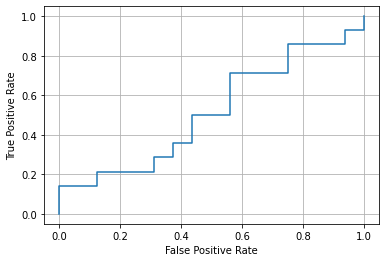

In [ ]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

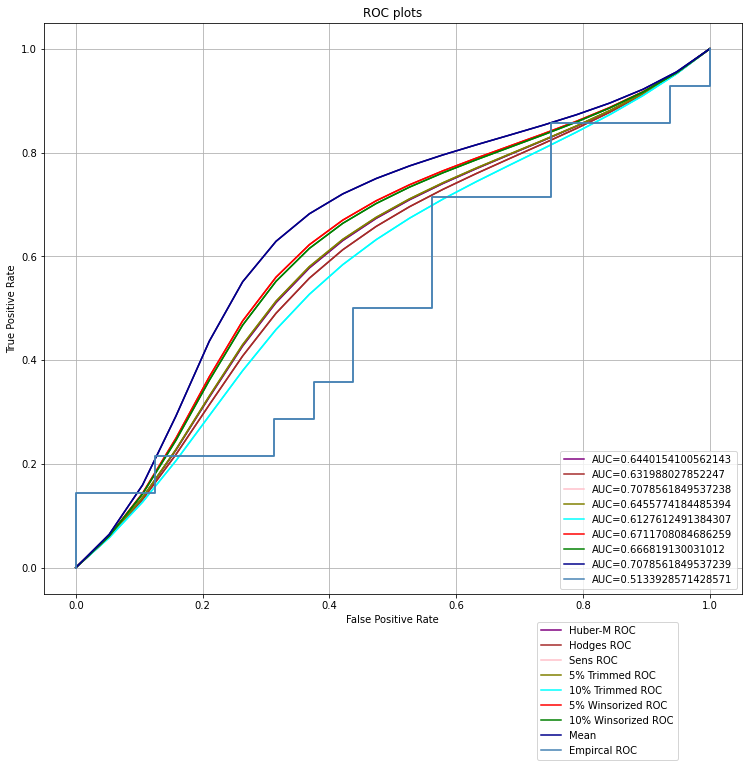

In [ ]:
#define metrics
import math
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#Bi-Cauchy constants after subtracting the not-diseased from the diseased
c1 = 0.6874
c2 = 0.6225
c3 = 1.0818
c4 = 0.696
c5 = 0.52305
c6 = 0.8434
c7 = 0.8174
c8 = 1.0818000000000012
estimates = ['Huber-M ROC', 'Hodges ROC', 'Sens ROC', '5% Trimmed ROC', '10% Trimmed ROC', '5% Winsorized ROC', '10% Winsorized ROC','Mean']
const = [c1,c2,c3,c4,c5,c6,c7,c8]
colors = ['purple','brown','pink', 'olive','cyan','red','green','darkblue','darkcyan','darkcyan']
col_count = 0
t = np.linspace(0,1,20)
ct = []
ct2 = []
x = np.pi*t - np.pi/2
for i in const:
  y = i + np.tan(x)
  z = 1/2 + 1/np.pi*np.arctan(y)

  auc2 = 1/2 + 1/np.pi*np.arctan(i/math.sqrt(2))

  globals()[f"h1_{col_count}"], = plt.plot(t,z,color = colors[col_count],label="AUC="+str(auc2))
  globals()[f"h2_{col_count}"], = plt.plot(t,z,color = colors[col_count], label=estimates[col_count])
  ct.append(globals()[f"h1_{col_count}"],)
  ct2.append(globals()[f"h2_{col_count}"],)
  col_count = col_count + 1






#create ROC curve
h32, = plt.plot(fpr,tpr,color = 'steelblue', label="AUC="+str(auc))
h3, =  plt.plot(fpr,tpr,color = 'steelblue', label="Empircal ROC")
plt.title("ROC plots")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.plot(tpr, np.tan(tpr))

ct.append(h32)
ct2.append(h3)
leg = plt.legend(handles=ct, loc='lower right')
ax = plt.gca().add_artist(leg)
leg = plt.legend(handles=ct2, loc=3, bbox_to_anchor=(0.7,-0.3))
fig = plt.gcf()
fig.set_size_inches(12.5, 10.5)
fig.savefig('test2png.png', dpi=100)
plt.grid()
plt.show()


